In [ ]:
%pip install seaborn
%pip install -U scikit-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv("car_crashes.csv")
#df=sns.load_dataset(name='car_crashes')
df.head(5)

In [ ]:
from turtle import color

sns.scatterplot(x='alcohol', y='total', color="blue", data=df)
#sns.scatterplot(x='speeding', y='total', color="red", data=df)

DECLARACIÓN DE VARIABLES DEPENDIENTES E INDEPENDIENTES

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_Indep= df[['alcohol', 'speeding']] #varias
Vars_Indep=df[['alcohol']] #una
Var_Dep=df['total']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [ ]:
type(model)

In [ ]:
model.fit(X=Vars_Indep, y=Var_Dep) #X mayúscula porque es una matriz y minúscula porque solo es un vector

In [ ]:
model.__dict__

$$
total= 2.0325063 \cdot alcohol + 5.857776154826299

$$

***************************Modelo predictivo***************************

In [ ]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[['alcohol', 'speeding']])
y_pred= model.predict(X=df[['alcohol']])
y_pred

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Predicciones', y_pred) #En la columna 0, nombre de la columnas y la variable
df

<AxesSubplot:xlabel='alcohol', ylabel='total'>

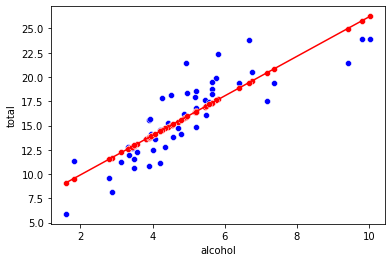

In [36]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='alcohol', y='total', color="blue", data=df) #total real
sns.scatterplot(x='alcohol', y='Predicciones', color="red", data=df) #predicción
sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df) #modelo

In [39]:
#Corroboramos cual es el coeficiente de correlación de nuestro modelo
coef_Deter = model.score(X=Vars_Indep, y=Var_Dep) #R^2 = 72% de eficiencia
coef_Deter

0.7269492966665405

In [40]:
#Coeficiente de determinación
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.8526132163334911